In [7]:
 # Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
import sys
sys.path.append('/home/ubuntu/fastai/')
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from glob2 import glob
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [9]:
# df = pd.DataFrame(columns=["file", "species"])

# for image in glob("/home/ubuntu/plants/data/train/**/*.png"):
#     dir_name = image.split('/')
#     file_name, species = dir_name[-1], dir_name[-2]

#     df = df.append({
#         "file": file_name,
#         "species": species
#         }, ignore_index=True)
# df.species.replace('/s+','_',regex=True,inplace =True)
# df.to_csv('labels.csv', index=False)

In [10]:
files = !ls /home/ubuntu/plants/Image-processing/train|head -10

In [11]:
filestest = !ls /home/ubuntu/plants/Image-processing/test/

In [12]:
x = []
y = []
for i, image in enumerate(filestest):
    img = plt.imread('/home/ubuntu/plants/Image-processing/test/'+image)
    x.append(img.shape[0])
    y.append(img.shape[1])

(array([ 98.,  86.,  84.,  89.,  73.,  74.,  83.,  76.,  65.,  66.]),
 array([ 200. ,  214.9,  229.8,  244.7,  259.6,  274.5,  289.4,  304.3,  319.2,  334.1,  349. ]),
 <a list of 10 Patch objects>)

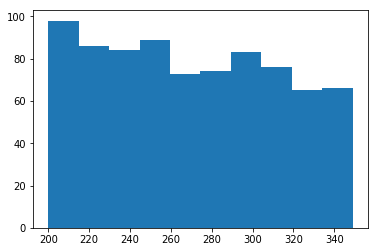

In [13]:
plt.hist(x)

(array([ 3.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  126.  ,   147.34,   168.68,   190.02,   211.36,   232.7 ,   254.04,   275.38,   296.72,   318.06,
          339.4 ,   360.74,   382.08,   403.42,   424.76,   446.1 ,   467.44,   488.78,   510.12,   531.46,
          552.8 ,   574.14,   595.48,   616.82,   638.16,   659.5 ,   680.84,   702.18,   723.52,   744.86,
          766.2 ,   787.54,   808.88,   830.22,   851.56,   872.9 ,   894.24,   915.58,   936.92,   958.26,
          979.6 ,  1000.94,  1022.28,  1043.62,  1064.96,  1086.3 ,  1107.64,  1128.98,  1150.32,  1171.66,
         1193.  ]),
 <a list of 50 Patch objects>)

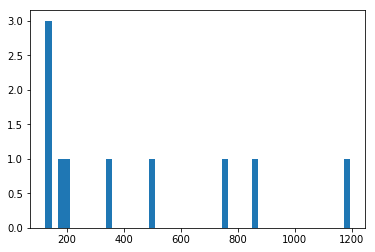

In [14]:
x = []
for i, image in enumerate(files):
    img = plt.imread('/home/ubuntu/plants/Image-processing/train/'+image)
    x.append(img.shape[0])
plt.hist(x,bins=50)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([    0.,    20.,    40.,    60.,    80.,   100.,   120.,   140.,   160.,   180.,   200.,   220.,   240.,
          260.,   280.,   300.,   320.,   340.,   360.,   380.,   400.,   420.,   440.,   460.,   480.,   500.,
          520.,   540.,   560.,   580.,   600.,   620.,   640.,   660.,   680.,   700.,   720.,   740.,   760.,
          780.,   800.,   820.,   840.,   860.,   880.,   900.,   920.,   940.,   960.,   980.,  1000.]),
 <a list of 50 Patch objects>)

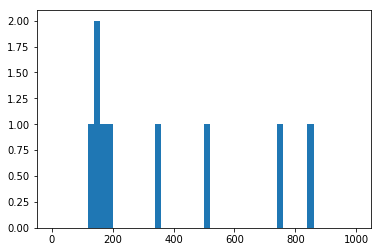

In [15]:

plt.hist(x,bins=50,range=[0,1000])


(175, 175, 3)
(140, 140, 3)
(756, 756, 3)
(350, 350, 3)
(1193, 1193, 3)
(196, 196, 3)
(144, 144, 3)
(856, 856, 3)
(510, 510, 3)
(126, 126, 3)


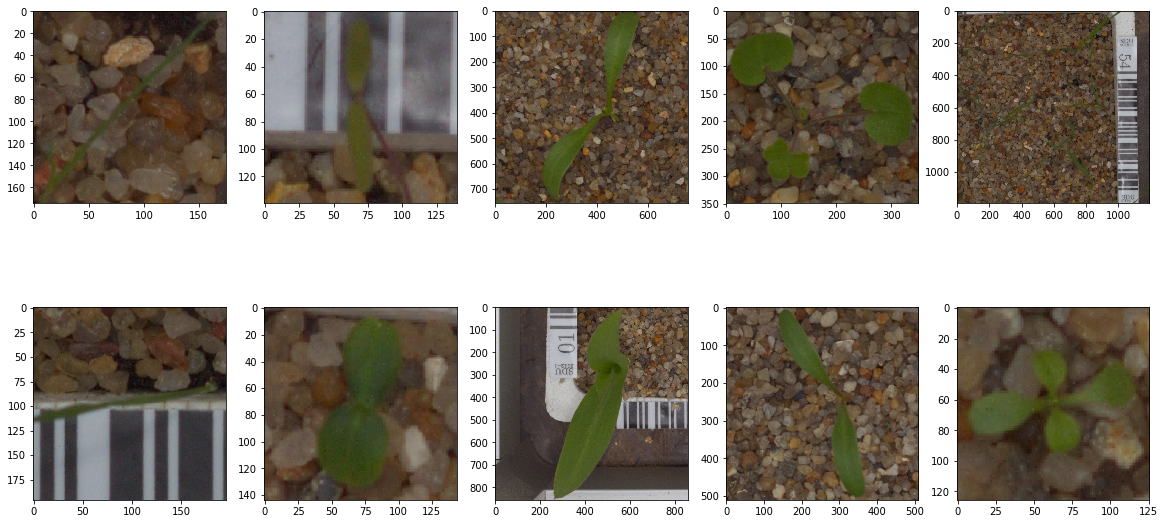

In [16]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(files):
    plt.subplot(2, columns, i + 1)
    img = plt.imread('/home/ubuntu/plants/Image-processing/train/'+image)
    plt.imshow(img)
    print(img.shape)

In [17]:
f_model = resnet50
PATH = '/home/ubuntu/plants/Image-processing/'
label_csv ='labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [18]:
def f1(preds, targs):
    preds = np.argmax(preds, 1)
    return f1_score(targs, preds, average='micro')

In [19]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    val_idxs=val_idxs, test_name='test')

In [20]:
data = get_data(64)

In [21]:
learn = ConvLearner.pretrained(f_model,data, ps=0.5,metrics=[f1])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 93%|█████████▎| 56/60 [00:15<00:01,  3.72it/s, loss=12.7]

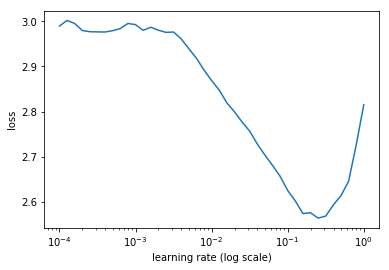

In [22]:
learn.lr_find()
learn.sched.plot()

In [23]:
lr =1e-2
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))


 15%|█▌        | 9/60 [00:03<00:20,  2.48it/s, loss=2.87]


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError:

[ 0.       2.08488  1.56317  0.50085]                     
[ 1.       1.76105  1.31857  0.56262]                     
[ 2.       1.54411  1.28303  0.57492]                     
[ 3.       1.44043  1.21371  0.58422]                     
[ 4.       1.36474  1.16699  0.60382]                     
[ 5.       1.31196  1.12636  0.60837]                     
[ 6.       1.27165  1.12892  0.60648]                     



In [20]:
lrs =np.array([lr/18,lr/6,lr/2])
learn.unfreeze()
learn.fit(lrs,n_cycle=3,cycle_len=1,cycle_mult=2)

A Jupyter Widget

[ 0.       0.9511   0.94594  0.66964]                     
[ 1.       0.85463  0.59754  0.78113]                      
[ 2.       0.69034  0.53197  0.80822]                      
[ 3.       0.57314  0.45228  0.83113]                      
[ 4.       0.45815  0.37338  0.8711 ]                      
[ 5.       0.38275  0.35602  0.86987]                      
[ 6.       0.35096  0.34427  0.8782 ]                      



In [21]:
sz = 128
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.47123  0.52519  0.81285]                      
[ 1.       0.53572  0.43406  0.84695]                      
[ 2.       0.51319  0.4292   0.85424]                      
[ 3.       0.49847  0.39931  0.86154]                      
[ 4.       0.47717  0.36702  0.86655]                      
[ 5.       0.44501  0.36203  0.86655]                      
[ 6.       0.42412  0.35441  0.86968]                      



In [22]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.24606  0.26232  0.90509]                      
[ 1.       0.24991  0.22954  0.91362]                      
[ 2.       0.21858  0.21168  0.92195]                      
[ 3.       0.20636  0.19884  0.93002]                      
[ 4.       0.18579  0.18712  0.93692]                      
[ 5.       0.15781  0.16986  0.94147]                      
[ 6.       0.13984  0.17554  0.93171]                      



In [17]:
learn.load('128')

In [21]:
lr =1e-2
lrs =np.array([lr/18,lr/6,lr/2])

In [20]:
sz = 256
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

                                                          
                                                          
                                                          
                                                          
                                                          
                                                          
                                                          
                                                          
  0%|          | 0/60 [00:00<?, ?it/s]
                                                          
                                                          

                                                          

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 0.       0.21679  0.23329  0.92299]                      
[ 1.       0.2507   0.19976  0.9282 ]                      
[ 2.       0.23165  0.20029  0.93133]                      
[ 3.       0.23036  0.18582  0.93881]                      
[ 4.       0.21106  0.17589  0.93588]                      
[ 5.       0.20389  0.17699  0.93464]                      
[ 6.       0.18822  0.17336  0.9409 ]                      



In [22]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.14619  0.14131  0.95046]                      
[ 1.       0.149    0.13485  0.94525]                      
[ 2.       0.13287  0.1174   0.95964]                      
[ 3.       0.13051  0.14661  0.95255]                      
[ 4.       0.11387  0.12061  0.95235]                      
[ 5.       0.08852  0.11497  0.96401]                       
[ 6.       0.07986  0.1133   0.96609]                       



In [23]:
learn.save(f'{sz}')

In [ ]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [ ]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [ ]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [ ]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [36]:
learn.save(f'{sz}')

In [ ]:
cm = confusion_matrix(y,preds)
plot_confusion_matrix(cm,data.classes)

In [26]:
pred,y = learn.TTA()

In [27]:
f1(pred,y)

0.96526315789473682

In [28]:
submission, test_y = learn.TTA(is_test=True)

In [29]:
submission = np.argmax(np.exp(submission),axis=1)

In [30]:
func = np.vectorize(lambda x:data.classes[x])
species = func(submission)

In [31]:
test_df = [f.split('/')[1] for f in data.test_dl.dataset.fnames]
test_df[:5]

['12625488b.png',
 'c832e4302.png',
 'e82017baa.png',
 'c10ccbd82.png',
 '8b27bfd2b.png']

In [32]:
len(species) == len(test_df)

True

In [33]:
submission_df = pd.DataFrame({'file': test_df, 'species': species})
submission_df.species.replace('_',' ',regex=True,inplace =True)
submission_df.to_csv('submission.csv.gz', compression = 'gzip',index=False)

In [34]:
data.classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common_Chickweed',
 'Common_wheat',
 'Fat_Hen',
 'Loose_Silky-bent',
 'Maize',
 'Scentless_Mayweed',
 'Shepherds_Purse',
 'Small-flowered_Cranesbill',
 'Sugar_beet']

In [37]:
learn